## The ARIMA model, which stands for AutoRegressive Integrated Moving Average, is a popular statistical method for time series forecasting. It combines three components:

1. **AutoRegressive (AR) part**
2. **Integrated (I) part**
3. **Moving Average (MA) part**


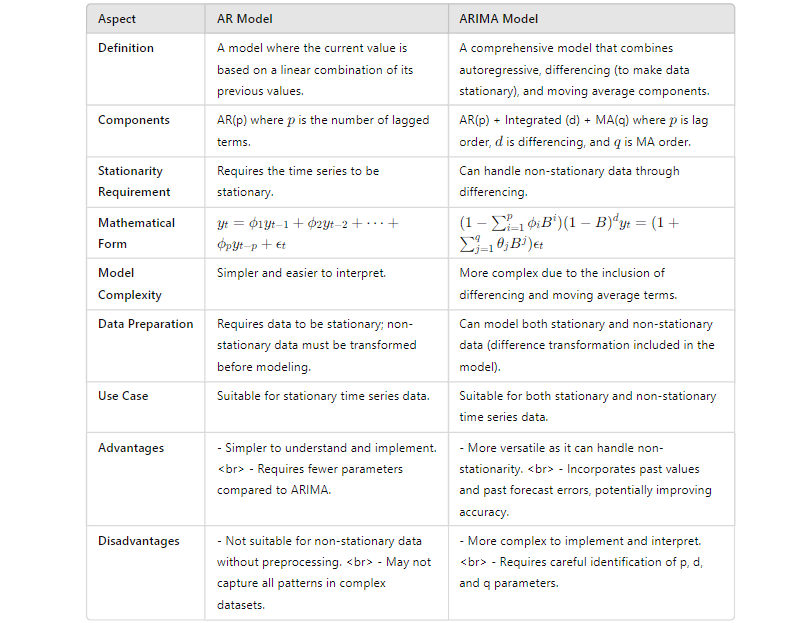



## Mathematical explanation of each component and how they come together in the ARIMA model.

### 1. AutoRegressive (AR) Part
The AR part of the model specifies that the output variable depends linearly on its own previous values. Mathematically, an AR model of order \( p \) (AR(p)) is written as:
\[ y_t = \phi_1 y_{t-1} + \phi_2 y_{t-2} + \cdots + \phi_p y_{t-p} + \epsilon_t \]
where:
- \( y_t \) is the value at time \( t \).
- \( \phi_1, \phi_2, \ldots, \phi_p \) are parameters of the model.
- \( \epsilon_t \) is white noise error term at time \( t \).

### 2. Integrated (I) Part
The integrated part of the model involves differencing the data to make it stationary, which means that the statistical properties (mean, variance) do not change over time. The order of differencing is denoted by \( d \). If \( y_t \) is the original time series, the differenced series \( y_t' \) of order \( d \) is given by:
\[ y_t' = (1 - B)^d y_t \]
where \( B \) is the backshift operator defined as \( By_t = y_{t-1} \).

For example, if \( d = 1 \), the differenced series is:
\[ y_t' = y_t - y_{t-1} \]

### 3. Moving Average (MA) Part
The MA part of the model specifies that the output variable depends linearly on the current and past values of a stochastic (white noise) term. Mathematically, an MA model of order \( q \) (MA(q)) is written as:
\[ y_t = \epsilon_t + \theta_1 \epsilon_{t-1} + \theta_2 \epsilon_{t-2} + \cdots + \theta_q \epsilon_{t-q} \]
where:
- \( y_t \) is the value at time \( t \).
- \( \theta_1, \theta_2, \ldots, \theta_q \) are parameters of the model.
- \( \epsilon_t, \epsilon_{t-1}, \ldots, \epsilon_{t-q} \) are white noise error terms.

### ARIMA Model
Combining the AR, I, and MA components, the ARIMA model of order \( (p, d, q) \) is represented as:
\[ (1 - B)^d y_t = \phi_1 (1 - B)^d y_{t-1} + \phi_2 (1 - B)^d y_{t-2} + \cdots + \phi_p (1 - B)^d y_{t-p} + \epsilon_t + \theta_1 \epsilon_{t-1} + \theta_2 \epsilon_{t-2} + \cdots + \theta_q \epsilon_{t-q} \]

Simplified, it becomes:
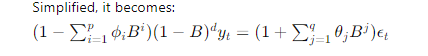

### Steps to Fit an ARIMA Model
1. **Identification**: Determine the values of \( p \), \( d \), and \( q \) using techniques like the Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF) plots.
2. **Estimation**: Estimate the parameters \( \phi \) and \( \theta \) using methods like Maximum Likelihood Estimation (MLE).
3. **Diagnostic Checking**: Check the residuals to ensure they resemble white noise using tools like the Ljung-Box test.
4. **Forecasting**: Use the fitted ARIMA model to forecast future values.



### Example
Suppose we have a time series \( y_t \) and we fit an ARIMA(1,1,1) model. This means:
- \( p = 1 \): The series has an autoregressive part of order 1.
- \( d = 1 \): The series has been differenced once to achieve stationarity.
- \( q = 1 \): The series has a moving average part of order 1.



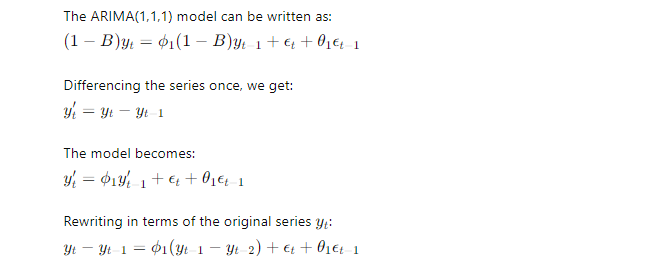

In [2]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

# Example time series data 
data = [10, 5, 15, 20, 10, 11, 8, 35, 30, 45]

# Define ARIMA parameters
p = 1  # AR parameter
d = 1  # Differencing parameter
q = 1  # MA parameter

# Fit ARIMA model
model = ARIMA(data, order=(p, d, q))
model_fit = model.fit()

# Forecast future values
forecast_steps = 6
predictions = model_fit.forecast(steps=forecast_steps)

# Print forecasted values
print("Forecasted values:", predictions)


Forecasted values: [37.64316287 43.56311223 38.79940741 42.63269757 39.54809977 42.03023475]


## Predicting Temp using ARIMA

In [3]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Load the historical temperature data 
temperature_data = pd.read_csv('temperature_data.csv')

In [4]:
temperature_data.head(2)

,Date,Temperature,Location
0,2020-01-01,28.820262,City B
1,2020-01-02,22.000786,City B


In [5]:
temperature_data.shape

(3000, 3)

In [8]:
# Convert 'Temperature' column to numeric data type
temperature_data['Temperature'] = pd.to_numeric(temperature_data['Temperature'], errors='coerce')

In [9]:
# Drop rows with missing or NaN values in the 'Temperature' column
temperature_data = temperature_data.dropna(subset=['Temperature'])

In [10]:

# Convert 'Date' column to datetime data type
temperature_data['Date'] = pd.to_datetime(temperature_data['Date'])

In [ ]:
# Set 'Date' column as the index
temperature_data.set_index('Date', inplace=True)

In [14]:
temperature_data.head(2)
temperature_data.shape

(3000, 2)

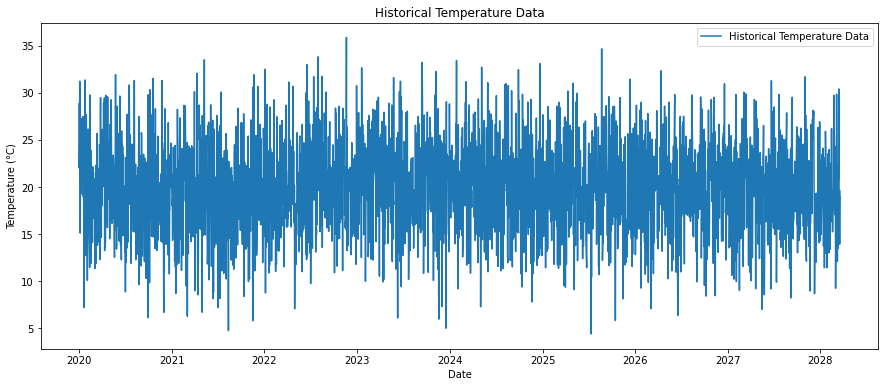

In [15]:
# Visualize the historical temperature data
plt.figure(figsize=(15, 6))
plt.plot(temperature_data.index, temperature_data['Temperature'], label='Historical Temperature Data')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.title('Historical Temperature Data')
plt.legend()
plt.show()

In [23]:
# Define ARIMA parameters
p = 2  # AR parameter
d = 2  # Differencing parameter
q = 1  # MA parameter

# Fit ARIMA model
model = ARIMA(temperature_data['Temperature'], order=(p, d, q))
model_fit = model.fit()

C:\Users\suyashi144893\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\suyashi144893\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\suyashi144893\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


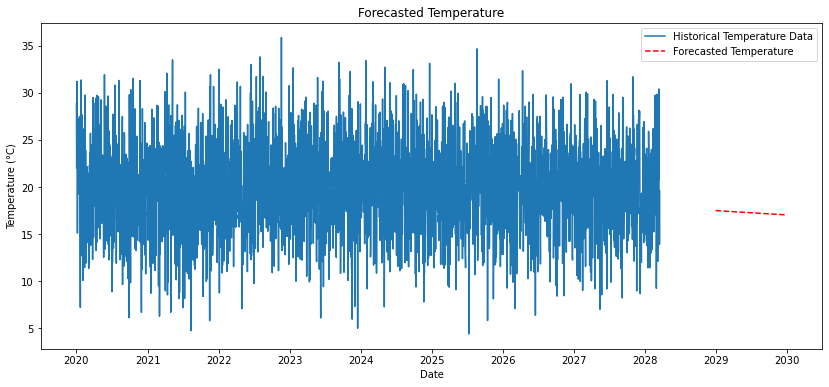

Forecasted temperatures for the next 2 years:
2028-03-19    17.498381
2028-03-20    17.039816
Freq: D, Name: predicted_mean, dtype: float64


In [24]:
# Forecast future temperatures
forecast_steps = 2  # Number of steps to forecast 
forecast = model_fit.forecast(steps=forecast_steps)

# Visualize the forecasted temperatures
plt.figure(figsize=(14, 6))
plt.plot(temperature_data.index, temperature_data['Temperature'], label='Historical Temperature Data')
plt.plot(pd.date_range(start=temperature_data.index[-1], periods=forecast_steps, freq='Y'), forecast, color='red', linestyle='--', label='Forecasted Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.title('Forecasted Temperature')
plt.legend()
plt.show()

# Print the forecasted temperatures
print("Forecasted temperatures for the next", forecast_steps, "years:")
print(forecast)


## Predict passengers frequency using ARIMA

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Load the data
data = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv', index_col='Month', parse_dates=True)
data.index.freq = 'MS'  # Set the frequency to Monthly Start
data.head(3)

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132


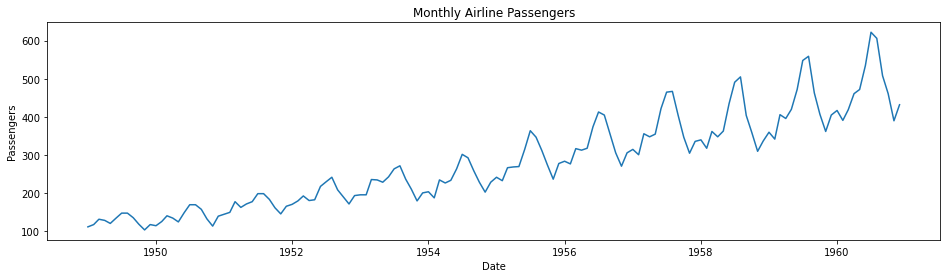

In [26]:

# Visualize the data
plt.figure(figsize=(16, 4))
plt.plot(data)
plt.title('Monthly Airline Passengers')
plt.xlabel('Date')
plt.ylabel('Passengers')
plt.show()

In [33]:
# Fit the ARIMA model
model = ARIMA(data, order=(2, 2, 1))
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:             Passengers   No. Observations:                  144
Model:                 ARIMA(2, 2, 1)   Log Likelihood                -692.943
Date:                Tue, 10 Sep 2024   AIC                           1393.887
Time:                        15:14:17   BIC                           1405.710
Sample:                    01-01-1949   HQIC                          1398.691
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3845      0.092      4.194      0.000       0.205       0.564
ar.L2         -0.2259      0.071     -3.181      0.001      -0.365      -0.087
ma.L1         -0.9987      0.676     -1.478      0.1

1961-01-01    466.218395
1961-02-01    471.918238
1961-03-01    468.409366
1961-04-01    467.801585
1961-05-01    470.389599
1961-06-01    473.551184
1961-07-01    476.211414
1961-08-01    478.549284
1961-09-01    480.876449
1961-10-01    483.272317
1961-11-01    485.697021
1961-12-01    488.117295
1962-01-01    490.529352
1962-02-01    492.939249
1962-03-01    495.350172
1962-04-01    497.761977
1962-05-01    500.173890
1962-06-01    502.585645
1962-07-01    504.997315
1962-08-01    507.408988
1962-09-01    509.820681
1962-10-01    512.232381
1962-11-01    514.644080
1962-12-01    517.055776
1963-01-01    519.467472
1963-02-01    521.879168
1963-03-01    524.290864
1963-04-01    526.702561
1963-05-01    529.114257
1963-06-01    531.525953
1963-07-01    533.937650
1963-08-01    536.349346
1963-09-01    538.761042
1963-10-01    541.172738
1963-11-01    543.584435
1963-12-01    545.996131
1964-01-01    548.407827
1964-02-01    550.819524
1964-03-01    553.231220
1964-04-01    555.642916


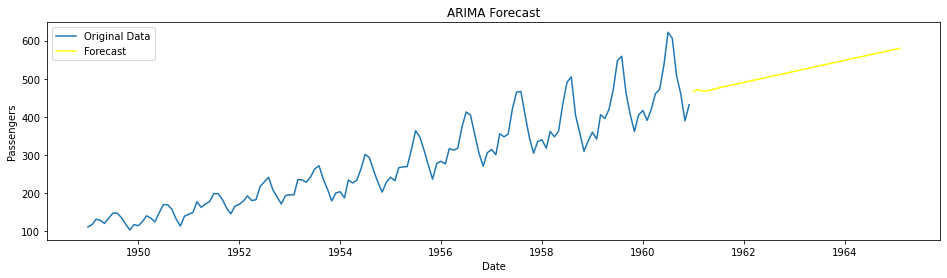

In [34]:

# Make predictions
forecast = model_fit.forecast(steps=50)
print(forecast)

# Plot the results
plt.figure(figsize=(16, 4))
plt.plot(data, label='Original Data')
plt.plot(forecast, label='Forecast', color='yellow')
plt.title('ARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Passengers')
plt.legend()
plt.show()


## Part 2 changing the order model = ARIMA(data, order=(2, 1, 2))

In [ ]:


# Fit the ARIMA model with different order (2, 1, 2)
model = ARIMA(data, order=(2, 1, 2))
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())

# Make predictions
forecast = model_fit.forecast(steps=100)
print(forecast)

# Plot the results
plt.figure(figsize=(10, 4))
plt.plot(data, label='Original Data')
plt.plot(forecast, label='Forecast', color='red')
plt.title('ARIMA Forecast (Order: (2, 1, 2))')
plt.xlabel('Date')
plt.ylabel('Passengers')
plt.legend()
plt.show()


## Part 3: Improving on prediction

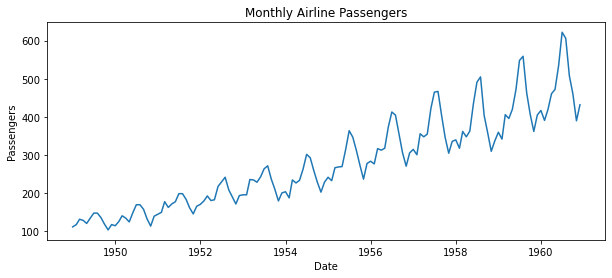

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Load the data
data = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv', index_col='Month', parse_dates=True)
data.index.freq = 'MS'  # Set the frequency to Monthly Start

# Visualize the data
plt.figure(figsize=(10, 4))
plt.plot(data)
plt.title('Monthly Airline Passengers')
plt.xlabel('Date')
plt.ylabel('Passengers')
plt.show()

C:\Users\suyashi144893\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:             Passengers   No. Observations:                  144
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -671.673
Date:                Tue, 10 Sep 2024   AIC                           1353.347
Time:                        15:16:15   BIC                           1368.161
Sample:                    01-01-1949   HQIC                          1359.366
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.6850      0.020     83.061      0.000       1.645       1.725
ar.L2         -0.9549      0.017    -55.420      0.000      -0.989      -0.921
ma.L1         -1.8432      0.124    -14.861      0.0

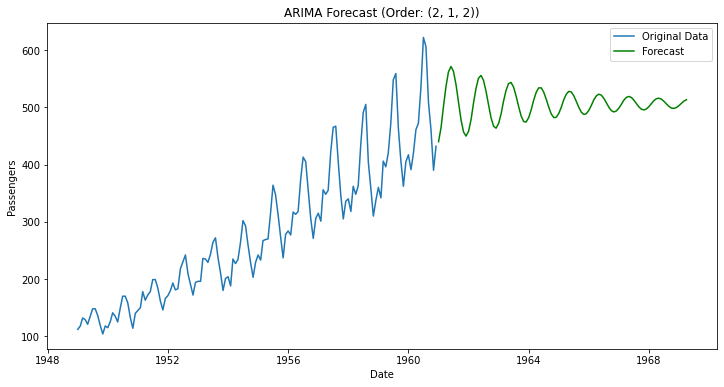

In [37]:


# Fit the ARIMA model with different order (2, 1, 2)
model = ARIMA(data, order=(2, 1, 2))
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())

# Make predictions
forecast = model_fit.forecast(steps=100)
print(forecast)

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(data, label='Original Data')
plt.plot(forecast, label='Forecast', color='green')
plt.title('ARIMA Forecast (Order: (2, 1, 2))')
plt.xlabel('Date')
plt.ylabel('Passengers')
plt.legend()
plt.show()


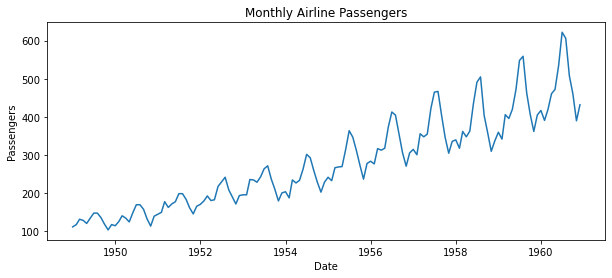

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error

# Load the data
data = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv', index_col='Month', parse_dates=True)
data.index.freq = 'MS'  # Set the frequency to Monthly Start

# Visualize the data
plt.figure(figsize=(10, 4))
plt.plot(data)
plt.title('Monthly Airline Passengers')
plt.xlabel('Date')
plt.ylabel('Passengers')
plt.show()

In [39]:
# Check for stationarity
def adf_test(series):
    result = adfuller(series)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    for key, value in result[4].items():
        print('Critical Values:')
        print(f'   {key}: {value}')
        
adf_test(data['Passengers'])

# Differencing to make the series stationary
data_diff = data.diff().dropna()
adf_test(data_diff['Passengers'])


ADF Statistic: 0.8153688792060457
p-value: 0.991880243437641
Critical Values:
   1%: -3.4816817173418295
Critical Values:
   5%: -2.8840418343195267
Critical Values:
   10%: -2.578770059171598
ADF Statistic: -2.8292668241699963
p-value: 0.05421329028382592
Critical Values:
   1%: -3.4816817173418295
Critical Values:
   5%: -2.8840418343195267
Critical Values:
   10%: -2.578770059171598


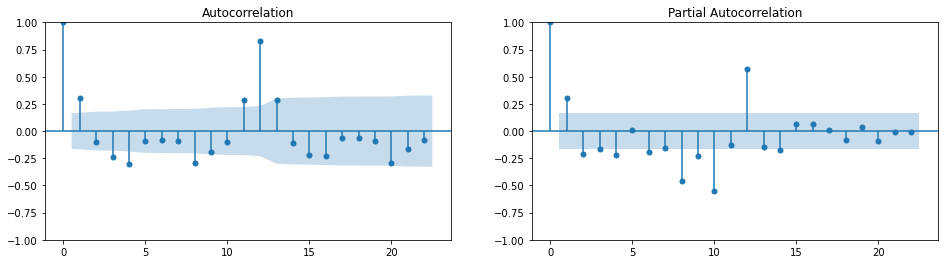

In [40]:
# Plot ACF and PACF to determine p and q
fig, axes = plt.subplots(1, 2, figsize=(16, 4))
plot_acf(data_diff, ax=axes[0])
plot_pacf(data_diff, ax=axes[1])
plt.show()

C:\Users\suyashi144893\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:             Passengers   No. Observations:                  144
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -671.673
Date:                Tue, 10 Sep 2024   AIC                           1353.347
Time:                        15:23:23   BIC                           1368.161
Sample:                    01-01-1949   HQIC                          1359.366
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.6850      0.020     83.061      0.000       1.645       1.725
ar.L2         -0.9549      0.017    -55.420      0.000      -0.989      -0.921
ma.L1         -1.8432      0.124    -14.861      0.0

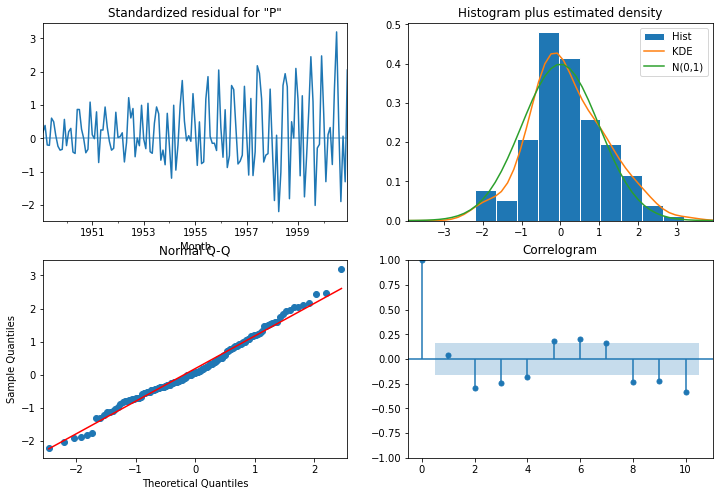

In [41]:
# Fit the ARIMA model (using a different set of parameters for illustration)
model = ARIMA(data, order=(2, 1, 2))
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())

# Model diagnostics
model_fit.plot_diagnostics(figsize=(12, 8))
plt.show()

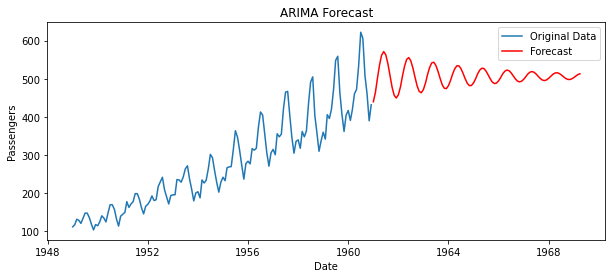

In [42]:
# Forecast
forecast_steps = 100
forecast = model_fit.forecast(steps=forecast_steps)
forecast_index = pd.date_range(start=data.index[-1], periods=forecast_steps + 1, freq='MS')[1:]
forecast_series = pd.Series(forecast, index=forecast_index)

# Plot the results
plt.figure(figsize=(10, 4))
plt.plot(data, label='Original Data')
plt.plot(forecast_series, label='Forecast', color='red')
plt.title('ARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Passengers')
plt.legend()
plt.show()

In [43]:

# Calculate the mean squared error (MSE) for validation
train_size = int(len(data) * 0.8)
train, test = data[0:train_size], data[train_size:]
model = ARIMA(train, order=(2, 1, 2))
model_fit = model.fit()
predictions = model_fit.forecast(steps=len(test))
mse = mean_squared_error(test, predictions)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 6808.39703605419
